In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.21.5
pandas version :  1.4.2
seaborn version :  0.11.2


In [2]:
# mengimport file dataset
df = pd.read_csv('Customertravel.csv')

In [3]:
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [4]:
# mengetahui info row dan column pada dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


In [5]:
# mengecek apakah ada missing value atau tidak
df.isna().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64

In [6]:
# perbandingan pada kolom fitur yang akan di analisa
target = df['Target'].value_counts().reset_index()
target.rename(columns={'index':'Target','Target':'freq'}, inplace=True)
target['percentage'] = round((target['freq']/target['freq'].sum())*100,2)
target

,Target,freq,percentage
0,0,730,76.52
1,1,224,23.48


In [7]:
df['Target'].value_counts()

0    730
1    224
Name: Target, dtype: int64

## Statistical Summary

In [8]:
df.columns

Index(['Age', 'FrequentFlyer', 'AnnualIncomeClass', 'ServicesOpted',
       'AccountSyncedToSocialMedia', 'BookedHotelOrNot', 'Target'],
      dtype='object')

In [9]:
# membagi kolom antara jenis numeric dan kategori
category = ['FrequentFlyer', 'AnnualIncomeClass', 'AccountSyncedToSocialMedia', 'BookedHotelOrNot']

numeric = ['Age', 'ServicesOpted', 'Target']

In [10]:
# penjelasan mengenai kolom numeric
df[numeric].describe()

,Age,ServicesOpted,Target
count,954.000000,954.000000,954.000000
mean,32.109015,2.437107,0.234801
std,3.337388,1.606233,0.424097
min,27.000000,1.000000,0.000000
25%,30.000000,1.000000,0.000000
50%,31.000000,2.000000,0.000000
75%,35.000000,4.000000,0.000000
max,38.000000,6.000000,1.000000


* mean dan median antara fitur Age, ServicesOpted, dan Target tidak berbeda jauh sehingga dapat dikatakan simetris
* untuk usia pelanggan yang menggunakan jasa travel dan tour minimal di angka 27 tahun dan maksimal 38 tahun

In [11]:
# penjelasan mengenai kolom kategori
df[category].describe()

,FrequentFlyer,AnnualIncomeClass,AccountSyncedToSocialMedia,BookedHotelOrNot
count,954,954,954,954
unique,3,3,2,2
top,No,Middle Income,No,No
freq,608,409,594,576


* Pada fitur Income diketahui yang paling mendominasi yaitu pelanggan dengan middle income
* Pelanggan paling banyak tidak melakukan penerbangan, tidak menghubungkan perusahaan dengan akun socialmedia mereka, dan tidak melakukan pemesanan hotel secara langsung 

## Univariate Analysis

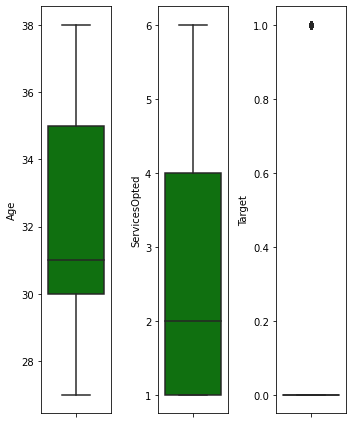

In [12]:
# adjust the figure size for better readability
plt.figure(figsize=(5,6))

# plotting
features = numeric
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='green')
    plt.tight_layout()

In [13]:
outlier = df['Target'].min()

df[df['Target'] == outlier]

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0
6,34,No,Middle Income,4,Yes,Yes,0
...,...,...,...,...,...,...,...
949,31,Yes,Low Income,1,No,No,0
950,30,No,Middle Income,5,No,Yes,0
951,37,No,Middle Income,4,No,No,0
952,30,No,Low Income,1,Yes,Yes,0


## Exploratory Data Analysis

In [14]:
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [15]:
df[df['Age']==30]

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0
8,30,No,Low Income,3,No,Yes,0
16,30,No,Low Income,1,Yes,Yes,0
17,30,Yes,High Income,1,Yes,No,0
...,...,...,...,...,...,...,...
937,30,Yes,Low Income,5,Yes,No,1
938,30,No,Middle Income,3,No,No,0
945,30,Yes,High Income,6,No,Yes,1
950,30,No,Middle Income,5,No,Yes,0


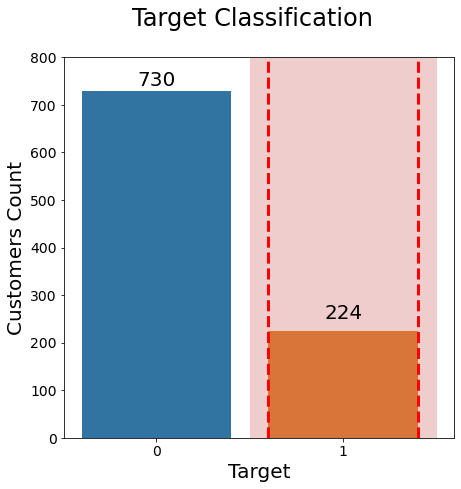

In [16]:
plt.figure(figsize=(7,7))
sns.countplot(x='Target', data=df)

plt.suptitle("Target Classification", fontsize=24)
plt.ylabel('Customers Count', fontsize=20) # x axis label
plt.xlabel('Target', fontsize=20) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14);

# add label
plt.text(x = 0, y = 740, s = "730", ha='center',fontsize = 20)
plt.text(x = 1, y = 250, s = "224", ha='center',fontsize = 20)

plt.ylim(0,800)
plt.stackplot(np.arange(0.5, 1.6 ,), [[800]], colors=('indianred',), alpha=0.3)
plt.axvline(x=0.6, color='red', linestyle='--', linewidth=3)
plt.axvline(x=1.4, color='red', linestyle='--', linewidth=3)
     

dari hasil diatas dapat memberikan informasi:

kebanyakan pelanggan di perusahaan tour and travels berada pada usia 30-an
layanan yang dipilih selama beberapa tahun terakhir adalah 'satu'
visualisasi target menunjukkan distribusi pelanggan kemungkinan churn yang lebih sedikit dibandingkan tidak churn, yang artinya terdapat banyak pelanggan yang loyal terhadap perusahaan. akan tetapi penting bagi perusahaan untuk mengurangi potensi pelanggan churn sehingga dapat memberikan keuntungan bagi perusahaan.

Text(0.5, 1.0, 'Age Distribution based on Churn Category')

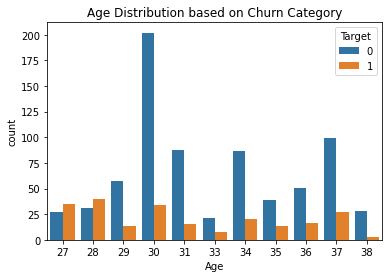

In [17]:
sns.countplot(data=df,
            hue='Target',
            x='Age')
plt.title("Age Distribution based on Churn Category")

* Dari data diatas dapat kita simpulkan pelanggan yang paling tinggi melakukan churn yaitu di usia 27 tahun dan 28 tahun, untuk usia paling rendah yaitu 38 tahun
* pelangan paling banyak di dominasi usia 30 tahun, sedangkan paling sedikit di usia 33 tahun

In [18]:
df['FrequentFlyer'].value_counts()

No           608
Yes          286
No Record     60
Name: FrequentFlyer, dtype: int64

Text(0.5, 1.0, 'Frequency Flyer Distribution based on Churn Category')

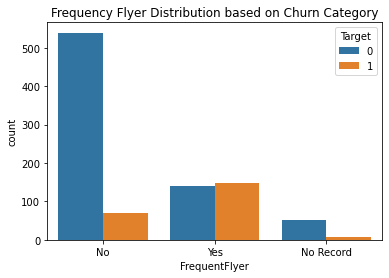

In [19]:
sns.countplot(data=df,
            hue='Target',
            x='FrequentFlyer')
plt.title("Frequency Flyer Distribution based on Churn Category")

* Dari data diatas dikatakan bahwa pelanggan yang paling banyak yaitu yang tidak melakukan penerbangan dalam menggunakan jasa travel dan sedikit juga dari tingkat churn
* Untuk pelanggan yang sering melakukan penerbangan yang paling banyak melakukan churn 
* Jika dilihat dari tingkat churn, pelanggan yang sering melakukan penerbangan juga yang paling banyak melakukan churn (Bisa dilihat dari grafik warna Orange)

In [20]:
df['AnnualIncomeClass'].value_counts()

Middle Income    409
Low Income       386
High Income      159
Name: AnnualIncomeClass, dtype: int64

Text(0.5, 1.0, 'Annual Income Distribution based on Churn Category')

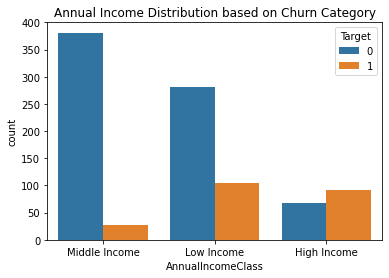

In [21]:
sns.countplot(data=df,
            hue='Target',
            x='AnnualIncomeClass')
plt.title("Annual Income Distribution based on Churn Category")

* Untuk pelanggan paling banyak dari kelas LowIncome, tetapi mereka lebih rendah untuk tingkat churn
* Tetapi jika melihat dari semua kategori tingkat churn, kategori LowIncome inilah yang paling tinggi melakukan churn, dibandingkan dengan MiddleIncome dan HighIncome (Bisa dilihat dari grafik berwarna Orange)

In [22]:
df['ServicesOpted'].value_counts()

1    404
2    176
3    124
4    117
5     69
6     64
Name: ServicesOpted, dtype: int64

Text(0.5, 1.0, 'ServicesOpted Distribution based on Churn Category')

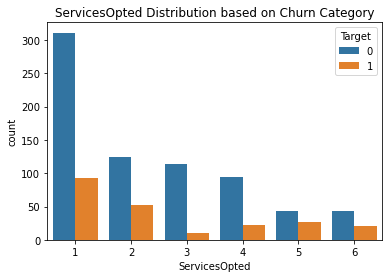

In [23]:
sns.countplot(data=df,
            hue='Target',
              x='ServicesOpted')
plt.title("ServicesOpted Distribution based on Churn Category")

* Untuk pelanggan yang paling banyak hanya menggunakan jasa servis 1 dari perusahaan jasa travel
* Untuk pelanggan yang hanya menggunakan servis sedikit dari perusahaan jasa travel, memiliki tingkat churn paling tinggi dari kategori yang lain 


In [24]:
df['AccountSyncedToSocialMedia'].value_counts()

No     594
Yes    360
Name: AccountSyncedToSocialMedia, dtype: int64

Text(0.5, 1.0, 'Account Sync to Social Media Distribution based on Churn Category')

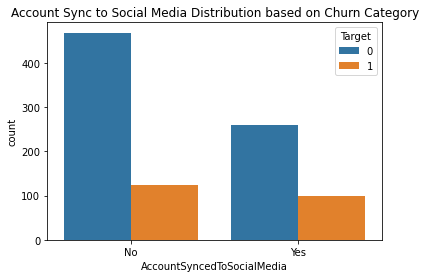

In [25]:
sns.countplot(data=df,
            hue='Target',
            x='AccountSyncedToSocialMedia')
plt.title("Account Sync to Social Media Distribution based on Churn Category")

* Untuk pelanggan yang tidak menghubungkan dengan akun social media mereka memiliki tingkat churn paling tinggi dan juga menjadi pelanggan paling banyak 

In [26]:
df['BookedHotelOrNot'].value_counts()

No     576
Yes    378
Name: BookedHotelOrNot, dtype: int64

Text(0.5, 1.0, 'Booked Hotel Distribution based on Churn Category')

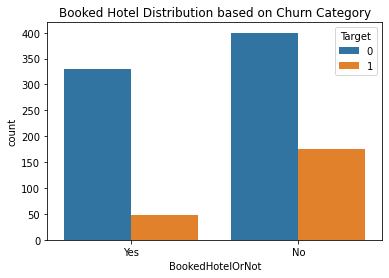

In [27]:
sns.countplot(data=df,
            hue='Target',
            x='BookedHotelOrNot')
plt.title("Booked Hotel Distribution based on Churn Category")

* Mayoritas pelanggan yang tidak melakukan pemesanan penginapan hotel paling banyak melakukan churn 

## Encoding 

Didalam pengolahan sebuah machine learning, sebuah data yang akan kita olah harus bersifat numeric maka dari itu disini saya mengubah value dari setiap kolom kategori menjadi numeric. Dengan berbagai metode mulai dari dari Label Encoding, hingga One Hot Encoding

In [28]:
# split data
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size = 0.8, random_state=42)

In [29]:
df.head(3)

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0


In [30]:
df_code = df.copy()

In [31]:
df_code

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0
...,...,...,...,...,...,...,...
949,31,Yes,Low Income,1,No,No,0
950,30,No,Middle Income,5,No,Yes,0
951,37,No,Middle Income,4,No,No,0
952,30,No,Low Income,1,Yes,Yes,0


In [32]:
df_code = df_code.replace({'AnnualIncomeClass': {'Low Income': 0, 'Middle Income': 1, 'High Income': 2}}) #hierarki encoding atau dictionary encoding
#train = train.replace({'AnnualIncomeClass': {'Low Income': 0, 'Middle Income': 1, 'High Income': 2}})
#test = test.replace({'AnnualIncomeClass': {'Low Income': 0, 'Middle Income': 1, 'High Income': 2}})

In [33]:
dummies = ['BookedHotelOrNot', 'AccountSyncedToSocialMedia', 'FrequentFlyer']
df_code = pd.get_dummies(df_code, columns = dummies, drop_first=True)
#train = pd.get_dummies(train, columns = dummies, drop_first=True)
#test = pd.get_dummies(test, columns = dummies, drop_first=True)

In [34]:
df_code.rename(columns={'BookedHotelOrNot_Yes':'BookedHotel', 'AccountSyncedToSocialMedia_Yes':'AccountSyncedToSocialMedia'}, inplace=True)
#train.rename(columns={'BookedHotelOrNot_Yes':'BookedHotel', 'AccountSyncedToSocialMedia_Yes':'AccountSyncedToSocialMedia'}, inplace=True)
#test.rename(columns={'BookedHotelOrNot_Yes':'BookedHotel', 'AccountSyncedToSocialMedia_Yes':'AccountSyncedToSocialMedia'}, inplace=True)

In [35]:
df_code.head()

,Age,AnnualIncomeClass,ServicesOpted,Target,BookedHotel,AccountSyncedToSocialMedia,FrequentFlyer_No Record,FrequentFlyer_Yes
0,34,1,6,0,1,0,0,0
1,34,0,5,1,0,1,0,1
2,37,1,3,0,0,1,0,0
3,30,1,2,0,0,0,0,0
4,30,0,1,0,0,0,0,0


In [36]:
df_code.sample(5)

,Age,AnnualIncomeClass,ServicesOpted,Target,BookedHotel,AccountSyncedToSocialMedia,FrequentFlyer_No Record,FrequentFlyer_Yes
245,30,2,1,0,1,0,0,1
666,30,0,1,0,1,1,0,0
328,37,0,4,0,1,0,0,0
662,28,1,3,0,0,1,0,0
639,34,1,2,0,0,0,1,0


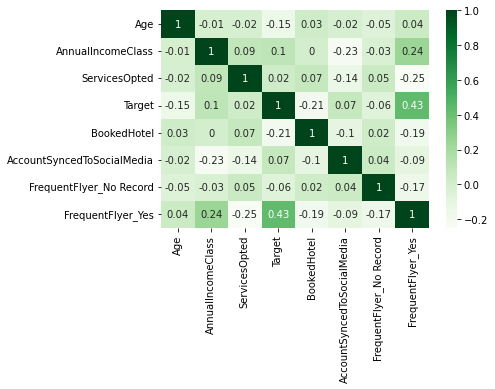

In [37]:
#visualisasi korelasi antara masing-masing kolom
sns.heatmap(np.round(df_code.corr(method ='spearman'), 2), annot=True,  cmap='Greens');

## Baseline

In [38]:
# encoding
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# split data
from sklearn.model_selection import train_test_split

# model -> cara manggil model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score
from sklearn.metrics import classification_report

from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

In [39]:
def evaluate(model, x_test, y_test, x_train, y_train):
    y_pred_train = model.predict(x_train)
    print('======= Data Train =======')
    print('------')
    print('Confusion Matrix Data Train:')
    print()
    print(classification_report(y_train, y_pred_train))
    print('------')
    
    tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()
    print('Assuming 1 as positive, we get for Data Train:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)
    
    print('')
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    print('Accuracy Data Train:', accuracy_score(y_train, y_pred_train))
    print('Precision Data Train:', precision)
    print('Recall Data Train:', recall)
    print('F1-Score Data Train:', 2 * (precision * recall)/(precision + recall))
    
    y_pred = model.predict(x_test)
    print('======= Data Test =======')
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_test, y_pred))
    print('------')
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)
    
    print('')
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision Data Test:', precision)
    print('Recall Data Test:', recall)
    print('F1-Score Data Test:', 2 * (precision * recall)/(precision + recall))

## Modelling KNN

In [40]:
train

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
292,29,No,Low Income,1,Yes,No,0
891,31,No,Middle Income,2,No,No,0
736,33,Yes,Low Income,1,Yes,Yes,0
109,27,Yes,Low Income,1,Yes,No,1
77,34,Yes,High Income,1,Yes,No,0
...,...,...,...,...,...,...,...
106,37,Yes,Low Income,1,Yes,No,0
270,37,No,Middle Income,6,No,Yes,0
860,37,No,Middle Income,4,No,Yes,0
435,37,Yes,Low Income,6,No,Yes,0


In [41]:
test

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
199,33,No Record,Low Income,2,Yes,No,1
422,37,No,Middle Income,3,Yes,No,0
695,30,No,Middle Income,2,No,Yes,0
751,30,No,Low Income,2,No,No,0
388,30,No,Low Income,1,Yes,No,0
...,...,...,...,...,...,...,...
33,35,Yes,High Income,1,No,No,1
31,34,No,Low Income,2,No,No,0
712,30,No,Low Income,1,Yes,Yes,0
321,30,Yes,High Income,4,No,No,1


In [42]:
# X_train = train.drop('Target',axis=1)
# y_train = train['Target']
# X_test = test.drop('Target',axis=1)
# y_test = test['Target']

In [43]:
X = df_code.drop('Target', axis=1) #predictor
y = df_code['Target'] #target

In [44]:
from sklearn.model_selection import train_test_split 
X_train, X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size = 0.3, #train : test = 70:30
                                                random_state = 42)

In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

In [46]:
knn_clf.fit(X_train,y_train) #KNN sedang melatih dirinya kedalam data train
y_pred_test = knn_clf.predict(X_test) #KNN memprediksi ke data test predictor (Xtest)
y_pred_train = knn_clf.predict(X_train) #KNN memprediksi ke data train predictor (Xtrain)

In [47]:
evaluate(knn_clf, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       511
           1       0.85      0.71      0.77       156

    accuracy                           0.90       667
   macro avg       0.88      0.83      0.85       667
weighted avg       0.90      0.90      0.90       667

------
Assuming 1 as positive, we get for Data Train:

True Positive: 110
True Negative: 492
False Positive: 19
False Negative: 46

Accuracy Data Train: 0.9025487256371814
Precision Data Train: 0.8527131782945736
Recall Data Train: 0.7051282051282052
F1-Score Data Train: 0.7719298245614036
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       219
           1       0.79      0.65      0.71        68

    accuracy                           0.87       287
   macro avg       0.84      0.80      0.81     

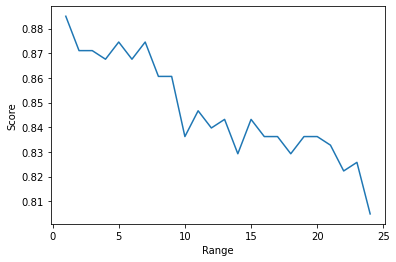

In [48]:
score_array = []
for each in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = each) #set K neighbor as 3
    knn_loop.fit(X_train,y_train)
    score_array.append(knn_loop.score(X_test,y_test))
    
plt.plot(range(1,25),score_array)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

In [49]:
knn_model = KNeighborsClassifier(n_neighbors = 1) #set K neighbor above
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
score_knn = knn_model.score(X_test,y_test)
print("KNN accuracy according to K=11 is :",score_knn)

KNN accuracy according to K=11 is : 0.8850174216027874


In [50]:
evaluate(knn_model, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       511
           1       0.88      0.90      0.89       156

    accuracy                           0.95       667
   macro avg       0.92      0.93      0.93       667
weighted avg       0.95      0.95      0.95       667

------
Assuming 1 as positive, we get for Data Train:

True Positive: 140
True Negative: 492
False Positive: 19
False Negative: 16

Accuracy Data Train: 0.9475262368815592
Precision Data Train: 0.8805031446540881
Recall Data Train: 0.8974358974358975
F1-Score Data Train: 0.8888888888888888
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       219
           1       0.79      0.71      0.74        68

    accuracy                           0.89       287
   macro avg       0.85      0.82      0.84     

## Baseline Modelling Random Forest

In [51]:
# define random forest classifier model
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

In [52]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [53]:
evaluate(rf_clf, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       511
           1       0.92      0.87      0.89       156

    accuracy                           0.95       667
   macro avg       0.94      0.92      0.93       667
weighted avg       0.95      0.95      0.95       667

------
Assuming 1 as positive, we get for Data Train:

True Positive: 135
True Negative: 500
False Positive: 11
False Negative: 21

Accuracy Data Train: 0.952023988005997
Precision Data Train: 0.9246575342465754
Recall Data Train: 0.8653846153846154
F1-Score Data Train: 0.8940397350993378
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       219
           1       0.79      0.66      0.72        68

    accuracy                           0.88       287
   macro avg       0.84      0.80      0.82      

## Decision Tree

In [54]:
df_clf = DecisionTreeClassifier()
df_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [55]:
evaluate(df_clf, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       511
           1       0.97      0.82      0.89       156

    accuracy                           0.95       667
   macro avg       0.96      0.91      0.93       667
weighted avg       0.95      0.95      0.95       667

------
Assuming 1 as positive, we get for Data Train:

True Positive: 128
True Negative: 507
False Positive: 4
False Negative: 28

Accuracy Data Train: 0.952023988005997
Precision Data Train: 0.9696969696969697
Recall Data Train: 0.8205128205128205
F1-Score Data Train: 0.8888888888888888
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       219
           1       0.81      0.74      0.77        68

    accuracy                           0.90       287
   macro avg       0.86      0.84      0.85       

### Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression()

In [57]:
evaluate(lr_model, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       511
           1       0.64      0.40      0.49       156

    accuracy                           0.81       667
   macro avg       0.74      0.66      0.69       667
weighted avg       0.79      0.81      0.79       667

------
Assuming 1 as positive, we get for Data Train:

True Positive: 62
True Negative: 476
False Positive: 35
False Negative: 94

Accuracy Data Train: 0.8065967016491754
Precision Data Train: 0.6391752577319587
Recall Data Train: 0.3974358974358974
F1-Score Data Train: 0.49011857707509887
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       219
           1       0.65      0.38      0.48        68

    accuracy                           0.80       287
   macro avg       0.74      0.66      0.68     

### SVM

In [58]:
from sklearn.svm import SVC
svc_model = SVC(random_state = 42)
svc_model.fit(X_train,y_train)

SVC(random_state=42)

In [59]:
evaluate(svc_model, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.77      1.00      0.87       511
           1       0.00      0.00      0.00       156

    accuracy                           0.77       667
   macro avg       0.38      0.50      0.43       667
weighted avg       0.59      0.77      0.66       667

------
Assuming 1 as positive, we get for Data Train:

True Positive: 0
True Negative: 511
False Positive: 0
False Negative: 156

Accuracy Data Train: 0.7661169415292354
Precision Data Train: nan
Recall Data Train: 0.0
F1-Score Data Train: nan
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.76      1.00      0.87       219
           1       0.00      0.00      0.00        68

    accuracy                           0.76       287
   macro avg       0.38      0.50      0.43       287
weighted avg       0.58      0.76      0.

## Naive Bayes

In [60]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB()

In [61]:
evaluate(nb_model, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       511
           1       0.54      0.60      0.57       156

    accuracy                           0.79       667
   macro avg       0.71      0.72      0.72       667
weighted avg       0.80      0.79      0.79       667

------
Assuming 1 as positive, we get for Data Train:

True Positive: 94
True Negative: 432
False Positive: 79
False Negative: 62

Accuracy Data Train: 0.7886056971514243
Precision Data Train: 0.5433526011560693
Recall Data Train: 0.6025641025641025
F1-Score Data Train: 0.5714285714285714
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       219
           1       0.58      0.62      0.60        68

    accuracy                           0.80       287
   macro avg       0.73      0.74      0.73      

## Gradient Boosting

In [62]:
#Fit and Train (Gradient Boosting)
from sklearn.ensemble import GradientBoostingClassifier

gbt_model = GradientBoostingClassifier()
gbt_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [63]:
evaluate(gbt_model, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       511
           1       0.88      0.81      0.85       156

    accuracy                           0.93       667
   macro avg       0.91      0.89      0.90       667
weighted avg       0.93      0.93      0.93       667

------
Assuming 1 as positive, we get for Data Train:

True Positive: 127
True Negative: 494
False Positive: 17
False Negative: 29

Accuracy Data Train: 0.9310344827586207
Precision Data Train: 0.8819444444444444
Recall Data Train: 0.8141025641025641
F1-Score Data Train: 0.8466666666666667
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       219
           1       0.78      0.74      0.76        68

    accuracy                           0.89       287
   macro avg       0.85      0.84      0.84     

## XGBoost

In [64]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [65]:
evaluate(xgb_model, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       511
           1       0.95      0.83      0.89       156

    accuracy                           0.95       667
   macro avg       0.95      0.91      0.93       667
weighted avg       0.95      0.95      0.95       667

------
Assuming 1 as positive, we get for Data Train:

True Positive: 130
True Negative: 504
False Positive: 7
False Negative: 26

Accuracy Data Train: 0.9505247376311844
Precision Data Train: 0.948905109489051
Recall Data Train: 0.8333333333333334
F1-Score Data Train: 0.8873720136518771
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       219
           1       0.83      0.74      0.78        68

    accuracy                           0.90       287
   macro avg       0.88      0.84      0.86       

## CatBoost

In [66]:
from catboost import CatBoostClassifier, Pool
cb = CatBoostClassifier()
cb.fit(X_train, y_train)

Learning rate set to 0.008666
0:	learn: 0.6884063	total: 143ms	remaining: 2m 22s
1:	learn: 0.6790400	total: 145ms	remaining: 1m 12s
2:	learn: 0.6693243	total: 146ms	remaining: 48.6s
3:	learn: 0.6605527	total: 148ms	remaining: 36.8s
4:	learn: 0.6543687	total: 149ms	remaining: 29.7s
5:	learn: 0.6446484	total: 151ms	remaining: 25s
6:	learn: 0.6377352	total: 152ms	remaining: 21.6s
7:	learn: 0.6311987	total: 154ms	remaining: 19s
8:	learn: 0.6211184	total: 155ms	remaining: 17.1s
9:	learn: 0.6167343	total: 156ms	remaining: 15.5s
10:	learn: 0.6070623	total: 158ms	remaining: 14.2s
11:	learn: 0.5984274	total: 159ms	remaining: 13.1s
12:	learn: 0.5950738	total: 160ms	remaining: 12.2s
13:	learn: 0.5894233	total: 161ms	remaining: 11.3s
14:	learn: 0.5862322	total: 162ms	remaining: 10.6s
15:	learn: 0.5796072	total: 163ms	remaining: 10.1s
16:	learn: 0.5762516	total: 165ms	remaining: 9.51s
17:	learn: 0.5675653	total: 166ms	remaining: 9.05s
18:	learn: 0.5591314	total: 167ms	remaining: 8.63s
19:	learn: 0.

229:	learn: 0.2176593	total: 477ms	remaining: 1.6s
230:	learn: 0.2171274	total: 479ms	remaining: 1.59s
231:	learn: 0.2167203	total: 481ms	remaining: 1.59s
232:	learn: 0.2161865	total: 483ms	remaining: 1.59s
233:	learn: 0.2158330	total: 485ms	remaining: 1.59s
234:	learn: 0.2155143	total: 487ms	remaining: 1.59s
235:	learn: 0.2151436	total: 489ms	remaining: 1.58s
236:	learn: 0.2147245	total: 491ms	remaining: 1.58s
237:	learn: 0.2144370	total: 493ms	remaining: 1.58s
238:	learn: 0.2140283	total: 496ms	remaining: 1.58s
239:	learn: 0.2140095	total: 497ms	remaining: 1.57s
240:	learn: 0.2134877	total: 499ms	remaining: 1.57s
241:	learn: 0.2132710	total: 500ms	remaining: 1.57s
242:	learn: 0.2130508	total: 502ms	remaining: 1.56s
243:	learn: 0.2127861	total: 503ms	remaining: 1.56s
244:	learn: 0.2124419	total: 505ms	remaining: 1.55s
245:	learn: 0.2120928	total: 506ms	remaining: 1.55s
246:	learn: 0.2115473	total: 508ms	remaining: 1.55s
247:	learn: 0.2113568	total: 510ms	remaining: 1.55s
248:	learn: 0

445:	learn: 0.1690261	total: 796ms	remaining: 989ms
446:	learn: 0.1689350	total: 798ms	remaining: 988ms
447:	learn: 0.1687688	total: 800ms	remaining: 985ms
448:	learn: 0.1686372	total: 801ms	remaining: 983ms
449:	learn: 0.1685196	total: 803ms	remaining: 981ms
450:	learn: 0.1683176	total: 804ms	remaining: 979ms
451:	learn: 0.1681605	total: 805ms	remaining: 976ms
452:	learn: 0.1679406	total: 807ms	remaining: 974ms
453:	learn: 0.1679057	total: 808ms	remaining: 972ms
454:	learn: 0.1678747	total: 809ms	remaining: 969ms
455:	learn: 0.1676932	total: 811ms	remaining: 967ms
456:	learn: 0.1674556	total: 812ms	remaining: 965ms
457:	learn: 0.1673130	total: 814ms	remaining: 963ms
458:	learn: 0.1671436	total: 815ms	remaining: 961ms
459:	learn: 0.1669710	total: 817ms	remaining: 959ms
460:	learn: 0.1668602	total: 818ms	remaining: 957ms
461:	learn: 0.1668592	total: 820ms	remaining: 955ms
462:	learn: 0.1667505	total: 822ms	remaining: 953ms
463:	learn: 0.1666794	total: 824ms	remaining: 952ms
464:	learn: 

678:	learn: 0.1458929	total: 1.13s	remaining: 536ms
679:	learn: 0.1457910	total: 1.14s	remaining: 534ms
680:	learn: 0.1457359	total: 1.14s	remaining: 532ms
681:	learn: 0.1456531	total: 1.14s	remaining: 531ms
682:	learn: 0.1456513	total: 1.14s	remaining: 529ms
683:	learn: 0.1456105	total: 1.14s	remaining: 527ms
684:	learn: 0.1455028	total: 1.14s	remaining: 525ms
685:	learn: 0.1454029	total: 1.14s	remaining: 524ms
686:	learn: 0.1452838	total: 1.15s	remaining: 522ms
687:	learn: 0.1451954	total: 1.15s	remaining: 520ms
688:	learn: 0.1451429	total: 1.15s	remaining: 519ms
689:	learn: 0.1450569	total: 1.15s	remaining: 517ms
690:	learn: 0.1449896	total: 1.15s	remaining: 516ms
691:	learn: 0.1448765	total: 1.16s	remaining: 514ms
692:	learn: 0.1448137	total: 1.16s	remaining: 513ms
693:	learn: 0.1447109	total: 1.16s	remaining: 511ms
694:	learn: 0.1446486	total: 1.16s	remaining: 509ms
695:	learn: 0.1445836	total: 1.16s	remaining: 507ms
696:	learn: 0.1444813	total: 1.16s	remaining: 506ms
697:	learn: 

901:	learn: 0.1298717	total: 1.46s	remaining: 159ms
902:	learn: 0.1298069	total: 1.46s	remaining: 157ms
903:	learn: 0.1297291	total: 1.46s	remaining: 155ms
904:	learn: 0.1296893	total: 1.46s	remaining: 154ms
905:	learn: 0.1296042	total: 1.47s	remaining: 152ms
906:	learn: 0.1295054	total: 1.47s	remaining: 151ms
907:	learn: 0.1294586	total: 1.47s	remaining: 149ms
908:	learn: 0.1294062	total: 1.47s	remaining: 147ms
909:	learn: 0.1293783	total: 1.47s	remaining: 146ms
910:	learn: 0.1293154	total: 1.48s	remaining: 144ms
911:	learn: 0.1292774	total: 1.48s	remaining: 143ms
912:	learn: 0.1291974	total: 1.48s	remaining: 141ms
913:	learn: 0.1291543	total: 1.48s	remaining: 139ms
914:	learn: 0.1290771	total: 1.48s	remaining: 138ms
915:	learn: 0.1289942	total: 1.49s	remaining: 136ms
916:	learn: 0.1289083	total: 1.49s	remaining: 135ms
917:	learn: 0.1288769	total: 1.49s	remaining: 133ms
918:	learn: 0.1288370	total: 1.49s	remaining: 131ms
919:	learn: 0.1287581	total: 1.49s	remaining: 130ms
920:	learn: 

In [67]:
evaluate(cb, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       511
           1       0.91      0.85      0.88       156

    accuracy                           0.95       667
   macro avg       0.93      0.91      0.92       667
weighted avg       0.95      0.95      0.95       667

------
Assuming 1 as positive, we get for Data Train:

True Positive: 133
True Negative: 498
False Positive: 13
False Negative: 23

Accuracy Data Train: 0.9460269865067467
Precision Data Train: 0.910958904109589
Recall Data Train: 0.8525641025641025
F1-Score Data Train: 0.880794701986755
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       219
           1       0.79      0.71      0.74        68

    accuracy                           0.89       287
   macro avg       0.85      0.82      0.84       

## Light Beam

In [68]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train,y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 156, number of negative: 511
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 30
[LightGBM] [Info] Number of data points in the train set: 667, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.233883 -> initscore=-1.186514
[LightGBM] [Info] Start training from score -1.186514
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

LGBMClassifier()

In [69]:
evaluate(lgb_model, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       511
           1       0.89      0.87      0.88       156

    accuracy                           0.94       667
   macro avg       0.93      0.92      0.92       667
weighted avg       0.94      0.94      0.94       667

------
Assuming 1 as positive, we get for Data Train:

True Positive: 135
True Negative: 495
False Positive: 16
False Negative: 21

Accuracy Data Train: 0.9445277361319341
Precision Data Train: 0.8940397350993378
Recall Data Train: 0.8653846153846154
F1-Score Data Train: 0.8794788273615636
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       219
           1       0.82      0.75      0.78        68

    accuracy                           0.90       287
   macro avg       0.87      0.85      0.86     

## Handling Imbalance

selisih precisi, recall, f1
1. lgbm : 7, 11 ,9
2. gb : 10, 8, 9
3. xgb: 11, 10 ,10
*kita bisa lihat 3 best model dari semua base line diatas, kita akan treate lgbm*

## 1. Undersampling : RandomUnderSampler

In [70]:
# import random undersampling library 
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# summarize class distribution
print('Before Handling RandomUnderSampling',Counter(y_train))

# define undersample strategy
undersample = RandomUnderSampler()

# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X_train,y_train)

# summarize class distribution
print('After Handling RandomUnderSampling',Counter(y_train_under))

Before Handling RandomUnderSampling Counter({0: 511, 1: 156})
After Handling RandomUnderSampling Counter({0: 156, 1: 156})


## Light Beam

In [71]:
lgb_model_under = lgb.LGBMClassifier()
lgb_model_under.fit(X_train_under, y_train_under)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 156, number of negative: 156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000140 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 28
[LightGBM] [Info] Number of data points in the train set: 312, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

LGBMClassifier()

In [72]:
evaluate(lgb_model_under, x_test = X_test, y_test = y_test, x_train=X_train_under, y_train=y_train_under)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       156
           1       0.92      1.00      0.96       156

    accuracy                           0.96       312
   macro avg       0.96      0.96      0.96       312
weighted avg       0.96      0.96      0.96       312

------
Assuming 1 as positive, we get for Data Train:

True Positive: 156
True Negative: 142
False Positive: 14
False Negative: 0

Accuracy Data Train: 0.9551282051282052
Precision Data Train: 0.9176470588235294
Recall Data Train: 1.0
F1-Score Data Train: 0.9570552147239264
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.99      0.85      0.92       219
           1       0.67      0.97      0.80        68

    accuracy                           0.88       287
   macro avg       0.83      0.91      0.86       287
weighted a

## Gradient Boosting

In [73]:
gbt_model_under = GradientBoostingClassifier()
gbt_model_under.fit(X_train_under, y_train_under)

GradientBoostingClassifier()

In [74]:
evaluate(gbt_model_under, x_test = X_test, y_test = y_test, x_train=X_train_under, y_train=y_train_under)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       156
           1       0.93      0.99      0.96       156

    accuracy                           0.96       312
   macro avg       0.96      0.96      0.96       312
weighted avg       0.96      0.96      0.96       312

------
Assuming 1 as positive, we get for Data Train:

True Positive: 154
True Negative: 145
False Positive: 11
False Negative: 2

Accuracy Data Train: 0.9583333333333334
Precision Data Train: 0.9333333333333333
Recall Data Train: 0.9871794871794872
F1-Score Data Train: 0.9595015576323987
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.99      0.84      0.91       219
           1       0.66      0.99      0.79        68

    accuracy                           0.88       287
   macro avg       0.83      0.92      0.85      

## Oversampling : SMOTE

In [75]:
# import random undersampling library 
from collections import Counter
from imblearn.over_sampling import SMOTE
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# summarize class distribution
print('Before Handling SMOTE',Counter(y_train))

# define undersample strategy
smote = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train, y_train)

# summarize class distribution
print('After Handling SMOTE',Counter(y_train_SMOTE))

Before Handling SMOTE Counter({0: 511, 1: 156})
After Handling SMOTE Counter({0: 511, 1: 511})


### Light Beam

In [76]:
lgb_model_smote = lgb.LGBMClassifier()
lgb_model_smote.fit(X_train_SMOTE, y_train_SMOTE)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 511, number of negative: 511
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 30
[LightGBM] [Info] Number of data points in the train set: 1022, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

LGBMClassifier()

In [77]:
evaluate(lgb_model_smote, x_test = X_test, y_test = y_test, x_train=X_train_SMOTE, y_train=y_train_SMOTE)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.98      0.91      0.94       511
           1       0.92      0.98      0.95       511

    accuracy                           0.95      1022
   macro avg       0.95      0.95      0.95      1022
weighted avg       0.95      0.95      0.95      1022

------
Assuming 1 as positive, we get for Data Train:

True Positive: 501
True Negative: 466
False Positive: 45
False Negative: 10

Accuracy Data Train: 0.9461839530332681
Precision Data Train: 0.9175824175824175
Recall Data Train: 0.9804305283757339
F1-Score Data Train: 0.9479659413434248
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       219
           1       0.70      0.87      0.78        68

    accuracy                           0.88       287
   macro avg       0.83      0.88      0.85     

### Gradient Boosting

In [78]:
gbt_model_smote = GradientBoostingClassifier()
gbt_model_smote.fit(X_train_SMOTE, y_train_SMOTE)

GradientBoostingClassifier()

In [79]:
evaluate(gbt_model_smote, x_test = X_test, y_test = y_test, x_train=X_train_SMOTE, y_train=y_train_SMOTE)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       511
           1       0.90      0.96      0.93       511

    accuracy                           0.93      1022
   macro avg       0.93      0.93      0.93      1022
weighted avg       0.93      0.93      0.93      1022

------
Assuming 1 as positive, we get for Data Train:

True Positive: 492
True Negative: 455
False Positive: 56
False Negative: 19

Accuracy Data Train: 0.9266144814090019
Precision Data Train: 0.8978102189781022
Recall Data Train: 0.9628180039138943
F1-Score Data Train: 0.9291784702549574
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.97      0.87      0.92       219
           1       0.68      0.91      0.78        68

    accuracy                           0.88       287
   macro avg       0.83      0.89      0.85     

In [80]:
y_pred_gbt_smote = gbt_model_smote.predict(X_test)
y_pred_gbt_smote

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0], dtype=int64)

In [81]:
predict_gbt = pd.DataFrame(gbt_model_smote.predict(X_test), columns=['hasil_prediksi_churn']) 
predict_gbt

,hasil_prediksi_churn
0,1
1,0
2,0
3,0
4,0
...,...
282,1
283,0
284,0
285,0


In [82]:
df_result_pred_rf = pd.concat([X_test.reset_index(drop='True'),predict_gbt.reset_index(drop='True')],axis=1)
df_result_pred_rf

,Age,AnnualIncomeClass,ServicesOpted,BookedHotel,AccountSyncedToSocialMedia,FrequentFlyer_No Record,FrequentFlyer_Yes,hasil_prediksi_churn
0,33,0,2,0,1,1,0,1
1,37,1,3,0,1,0,0,0
2,30,1,2,1,0,0,0,0
3,30,0,2,0,0,0,0,0
4,30,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...
282,35,0,3,0,0,0,1,1
283,28,1,2,0,1,0,0,0
284,27,1,4,1,0,0,0,0
285,29,2,1,0,1,0,1,0


In [83]:
only_class_1 = df_result_pred_rf[df_result_pred_rf['hasil_prediksi_churn']==1]
only_class_1

,Age,AnnualIncomeClass,ServicesOpted,BookedHotel,AccountSyncedToSocialMedia,FrequentFlyer_No Record,FrequentFlyer_Yes,hasil_prediksi_churn
0,33,0,2,0,1,1,0,1
6,35,0,2,0,1,0,1,1
13,28,2,4,0,0,0,1,1
15,31,0,4,0,1,0,0,1
16,36,0,3,1,0,0,1,1
...,...,...,...,...,...,...,...,...
267,37,0,4,0,1,0,0,1
268,35,0,3,1,0,0,1,1
269,34,0,2,0,1,0,0,1
278,30,2,1,0,0,0,1,1
